В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделі близькими до ваших найкращих припущень?

In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [346]:
medical_df = pd.read_csv('../../data/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']
non_smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [347]:
def show(X, target, predictions, task_label):
    # Візуалізація результатів
    plt.figure(figsize=(10, 6))
    plt.scatter(X, target, color='blue', label='Data points')
    plt.plot(X, predictions, color='red', label=task_label)
    plt.xlabel('Значення змінної')
    plt.ylabel('Цільове значення')
    plt.legend()
    plt.grid(True)
    plt.show()

### 1. Метод найменших квадратів

In [348]:
X = non_smoker_df.age 
y = non_smoker_df.charges

In [349]:
def normal_ewuations(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [350]:
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X_with_intercept[:5]

array([[ 1., 18.],
       [ 1., 28.],
       [ 1., 33.],
       [ 1., 32.],
       [ 1., 31.]])

In [351]:
# Розраховуємо коефіцієнти моделі
MNK_coefs = normal_ewuations(X_with_intercept, y)
# Робимо прогнози для всіх даних за датасету
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)
# РОзраховуємо RMSE
rmse_MNK = root_mean_squared_error(y, predictions_MNK)


print(f'Коефіувєнти моделі отримані МНК: {MNK_coefs}')
print(f'Похибка: {rmse_MNK}')


Коефіувєнти моделі отримані МНК: [-2091.42055657   267.24891283]
Похибка: 4662.505766636395


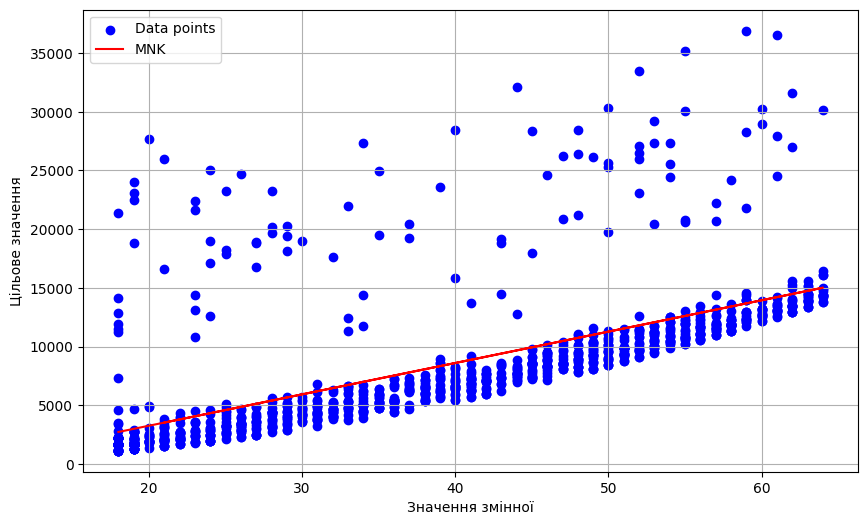

In [352]:
show(X, y, predictions_MNK, 'MNK')

### 2. Full-Batch градієнтний спуск

In [353]:
def full_batch_gradient_descent(X, y, lr=0.1, epoch=100):
    # Задаємо початуові коефіцієнти
    m, b = 0.0, 0.0
    # кількість екземплярів
    n = len(y)
    errors = []
    for i in range(epoch):
        # Підставляяємо поточні коефіцієнти для прогнозування всіх даних
        y_pred = m * X[:,0] + b
        # розраховуємо похибку на поточній ітерації
        err = y_pred - y
        errors.append(np.sqrt(np.sum(err**2)))
        # Розраховуємо нові значення коефіцієнтів за формулою
        m = m - lr * (2/n) * np.dot(err, X[:,0])
        b = b - lr * (2/n) * np.sum(err)
        # m_gradient = (2/n) * np.dot(error, X[:, 0])
        # b_gradient = (2/n) * np.sum(error)
        # m = m - lr * m_gradient
        # b = b - lr * b_gradient
    return b, m, errors

In [354]:
X_gd = np.expand_dims(X, axis=1)
# Сворюємо 3 можелі з різними параметрами
res1 = full_batch_gradient_descent(X_gd, y, lr=0.000001, epoch=10000)
res2 = full_batch_gradient_descent(X_gd, y, lr=0.001, epoch=200)
res3 = full_batch_gradient_descent(X_gd, y, lr=0.0001, epoch=300)

# коефіцієнти моделі
FBGD_coefs_1 = res1[:2]
FBGD_coefs_2 = res2[:2]
FBGD_coefs_3 = res3[:2]

# Робимо прогнози для всіх даних за датасету
predictions_FBGD_1 = np.dot(X_with_intercept, res1[:2])
predictions_FBGD_2 = np.dot(X_with_intercept, res2[:2])
predictions_FBGD_3 = np.dot(X_with_intercept, res3[:2])

# Розраховуємо RMSE
rmse_FBGD_1 = root_mean_squared_error(y, predictions_FBGD_1)
rmse_FBGD_2 = root_mean_squared_error(y, predictions_FBGD_2)
rmse_FBGD_3 = root_mean_squared_error(y, predictions_FBGD_3)


rmse_FBGD_1, rmse_FBGD_2, rmse_FBGD_3

(4715.3497503703065, 3.7101192774422054e+83, 4714.875926650096)

Найменшу похибку має третя модель з параметрами lr = 0.0001, epoch=300

Виведемо отримані нею коефіцієнти та візуалізуємо результат

In [355]:
print(f'Коефіувєнти моделі отримані Методом Градієнтоного спуску: {FBGD_coefs_3}')
print(f'Похибка: {rmse_FBGD_3}')

Коефіувєнти моделі отримані Методом Градієнтоного спуску: (-9.237987032659776, 220.36735017840093)
Похибка: 4714.875926650096


<function matplotlib.pyplot.show(close=None, block=None)>

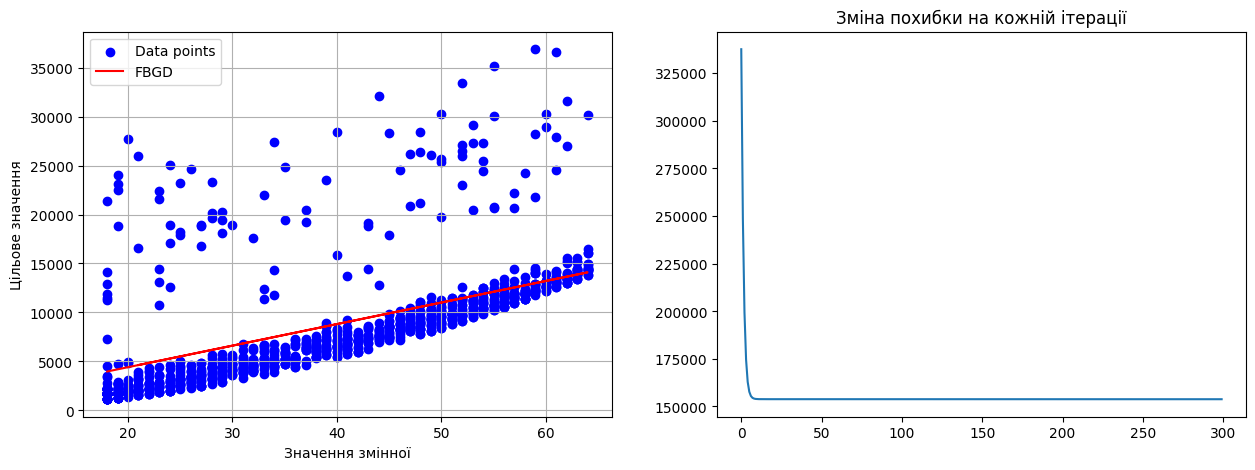

In [356]:
fig = plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, predictions_FBGD_3, color='red', label="FBGD")
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
erors = res3[2]
its= np.arange(len(erors))
plt.plot(its, erors)
plt.title('Зміна похибки на кожній ітерації')
plt.show


### 3. scikit-learn.LinearRegression

In [357]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(np.expand_dims(X.to_numpy(), axis=1), y.to_numpy())

# Розраховуємо коефіцієнти моделі
LR_coefs = [lin_reg.intercept_, lin_reg.coef_[0],]
# Робимо прогнози для всіх даних за датасету
predictions_LR = np.dot(X_with_intercept, LR_coefs)
# РОзраховуємо RMSE
rmse_LR = root_mean_squared_error(y, predictions_LR)


print(f'Коефіувєнти моделі отримані Методом Градієнтоного спуску: {LR_coefs}')
print(f'Похибка: {rmse_LR}')


Коефіувєнти моделі отримані Методом Градієнтоного спуску: [-2091.4205565650864, 267.2489128311997]
Похибка: 4662.505766636395


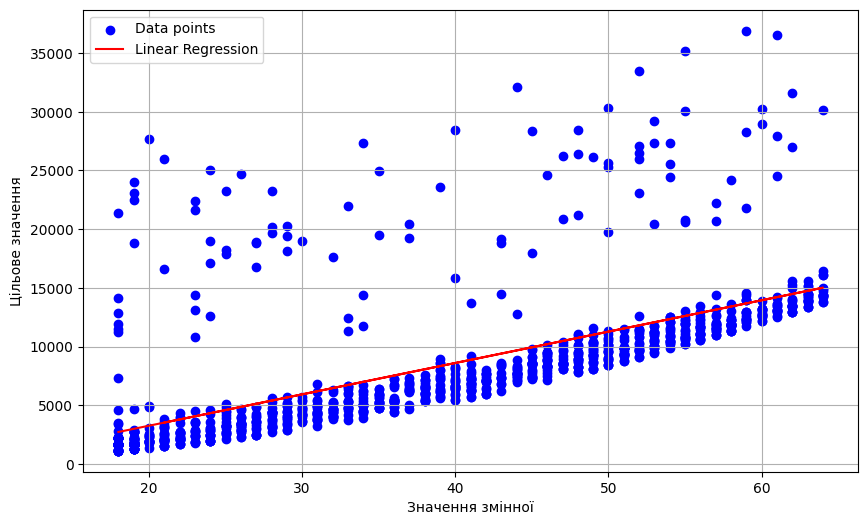

In [358]:
show(X, y, predictions_LR, "Linear Regression")

### Висновки


Порівнємо візуально результати отримані трбома способами

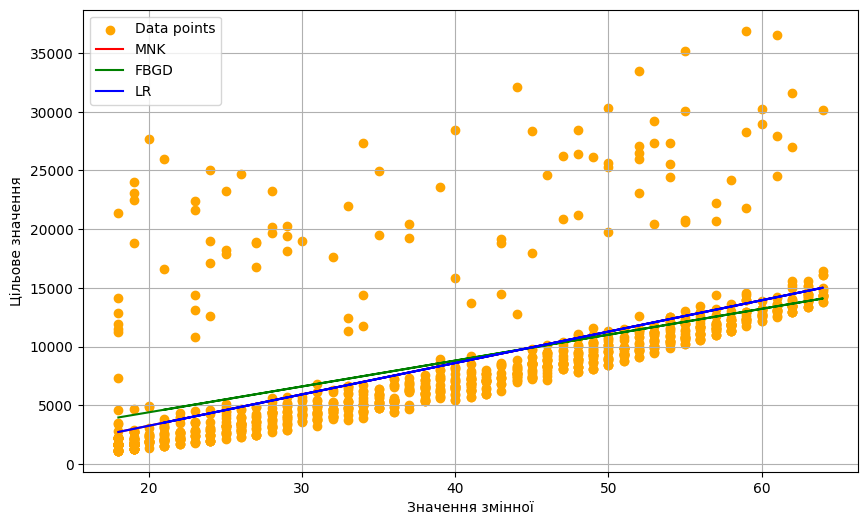

In [359]:

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='orange', label='Data points')
plt.plot(X, predictions_MNK, color='red', label='MNK')
plt.plot(X, predictions_FBGD_3, color='green', label='FBGD')
plt.plot(X, predictions_LR, color='blue', label='LR')

plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [360]:
print(f'Похибка для моделі МНК:{rmse_MNK}')
print(f'Похибка для моделі FBGD:{rmse_FBGD_3}')
print(f'Похибка для моделі LR:{rmse_LR}')


Похибка для моделі МНК:4662.505766636395
Похибка для моделі FBGD:4714.875926650096
Похибка для моделі LR:4662.505766636395


Усі три моделі змогли побудували лінію наближену до розподілу залежності зборів від віку для некурців, поте результати трохи відрізняються.
Так як LinearRegresion використовує МНК, результати цієї моделі збігаються з МНК з розрахунками вручну. За значеннями RMSE видно, що меншу похибку мають моделі що використвують метод найменших квадратів, отже вони більш точно відображають залежнісьт між змінними.

Моїм найкращим припущенням коефіцієнтів були m = 250, b = -2500, найкращі значення знайдені моделлю МНК трохі відрізняються, b =  -2091.42055657, m =  267.24891283

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [361]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [363]:
smoker_X = smoker_df.age 
smoker_y = smoker_df.charges
smoker_X_with_intercept = np.c_[np.ones((smoker_X.shape[0], 1)), smoker_X]

In [364]:
smoker_lin_reg = LinearRegression()

smoker_lin_reg.fit(np.expand_dims(smoker_X.to_numpy(), axis=1), smoker_y.to_numpy())

# Розраховуємо коефіцієнти моделі
smoker_LR_coefs = [lin_reg.intercept_, lin_reg.coef_[0],]
# Робимо прогнози для всіх даних за датасету
smoker_predictions_LR = np.dot(smoker_X_with_intercept, smoker_LR_coefs)
# РОзраховуємо RMSE
smoker_rmse_LR = root_mean_squared_error(smoker_y, smoker_predictions_LR)


print(f'Коефіувєнти моделі отримані Методом Градієнтоного спуску: {smoker_LR_coefs}')
print(f'Похибка: {smoker_rmse_LR}')

Коефіувєнти моделі отримані Методом Градієнтоного спуску: [-2091.4205565650864, 267.2489128311997]
Похибка: 26148.867808867617


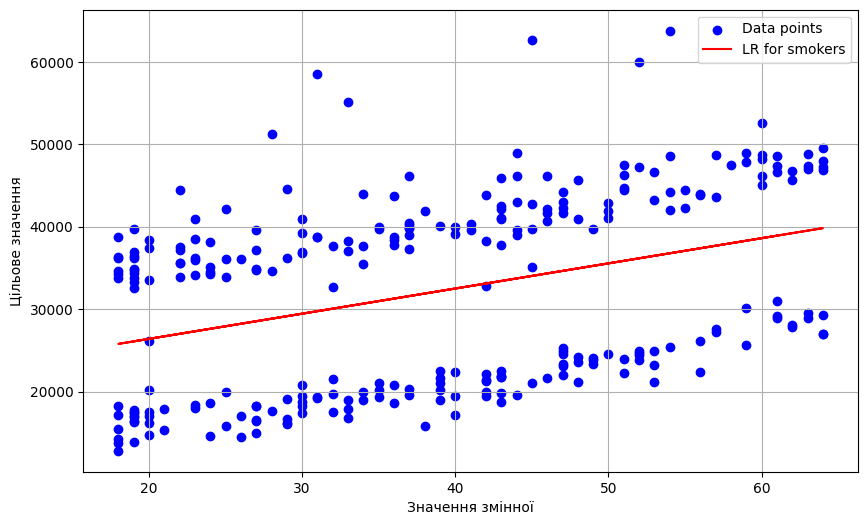

In [ ]:
show(smoker_X, smoker_y, predictions_LR, 'LR for smokers')

Для даних курців отримана можель не є хорошою, адже на графіку чітко видно що є дві різні групи людей і отримана лінія не відповідає жодній з них